In [74]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.nn.functional import one_hot
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 10),
        )

    def forward(self, x):
        return self.layers(x)

# Create the model
model = MLP()

# Create a loader with the MNIST dataset
transform = transforms.ToTensor()
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [50000, 10000])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

# Set loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

# Training loop
for epoch in range(20):  # number of times to loop over the dataset
    for images, labels in train_loader:
        # Convert labels to one-hot encoding
        labels_one_hot = one_hot(labels, num_classes=10).float()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = loss_fn(outputs, labels_one_hot)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Training Epoch {epoch+1}, Loss: {loss.item()}')

    # Validation step
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        print(f"correct = {correct}, total={total}")
    print(f'Validation Accuracy after Epoch {epoch+1}: {accuracy}%')

Training Epoch 1, Loss: 0.04956311732530594
correct = 7919, total=10000
Validation Accuracy after Epoch 1: 79.19%
Training Epoch 2, Loss: 0.03886555880308151
correct = 8406, total=10000
Validation Accuracy after Epoch 2: 84.06%
Training Epoch 3, Loss: 0.035146139562129974
correct = 8777, total=10000
Validation Accuracy after Epoch 3: 87.77%
Training Epoch 4, Loss: 0.018487300723791122
correct = 8905, total=10000
Validation Accuracy after Epoch 4: 89.05%
Training Epoch 5, Loss: 0.032360803335905075
correct = 8985, total=10000
Validation Accuracy after Epoch 5: 89.85%
Training Epoch 6, Loss: 0.01085223164409399
correct = 9046, total=10000
Validation Accuracy after Epoch 6: 90.46%
Training Epoch 7, Loss: 0.02357623353600502
correct = 9093, total=10000
Validation Accuracy after Epoch 7: 90.93%
Training Epoch 8, Loss: 0.01277521438896656
correct = 9138, total=10000
Validation Accuracy after Epoch 8: 91.38%
Training Epoch 9, Loss: 0.012875780463218689
correct = 9161, total=10000
Validation A

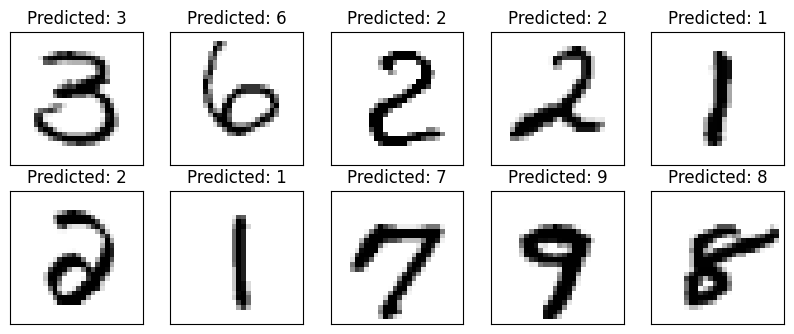

In [84]:
# Inference
model.eval()
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
images, labels = next(iter(test_loader))
with torch.no_grad():
    outputs = model(images)

_, predicted = torch.max(outputs, 1)

# Plot the images with the predicted labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title('Predicted: ' + str(predicted[i].item()))
plt.show()

In [81]:
for i in model.parameters():
    print(i)
    print(i.size())

Parameter containing:
tensor([[ 0.0086, -0.0235,  0.0334,  ..., -0.0313, -0.0081, -0.0317],
        [-0.0056, -0.0111,  0.0045,  ...,  0.0261,  0.0143, -0.0013],
        [-0.0039, -0.0219,  0.0236,  ..., -0.0056, -0.0178, -0.0271],
        ...,
        [ 0.0065, -0.0224, -0.0016,  ...,  0.0271,  0.0339,  0.0278],
        [ 0.0104,  0.0110, -0.0262,  ...,  0.0283, -0.0187, -0.0347],
        [ 0.0308, -0.0264, -0.0052,  ..., -0.0057,  0.0337,  0.0258]],
       requires_grad=True)
torch.Size([16, 784])
Parameter containing:
tensor([ 0.0061,  0.0786,  0.1524,  0.2151,  0.2234,  0.1286,  0.1993,  0.1269,
        -0.0422,  0.1068,  0.0849, -0.2023,  0.0436,  0.1566,  0.2400,  0.2084],
       requires_grad=True)
torch.Size([16])
Parameter containing:
tensor([[-4.4817e-02, -2.4478e-01,  3.1008e-01, -1.1594e-01,  3.4108e-01,
         -4.3655e-02,  5.2996e-02,  1.9930e-01,  2.0563e-01,  2.7126e-01,
         -1.4606e-01, -3.2810e-01,  9.0978e-02,  9.2531e-02, -2.4779e-01,
          8.9904e-02],
 